First excersise of the Image Analysis Course. 

Done by: @famu8 // Fernando A Marina Urriola

In [2]:
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv

In [3]:
# Directory containing data and images
in_dir = "./data"

# X-ray image
im_name = "/metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [4]:
print(im_org.shape)

(512, 512)


In [5]:
print(im_org.dtype)

uint8


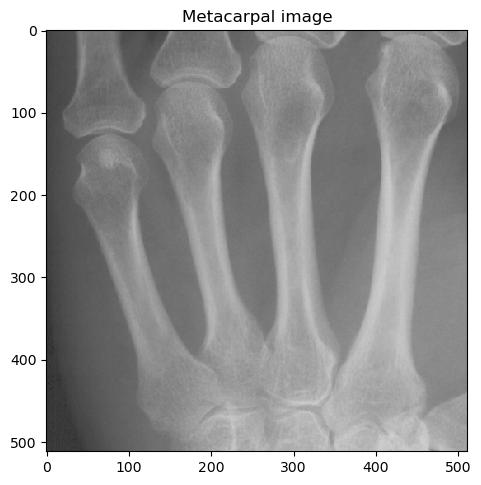

In [6]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

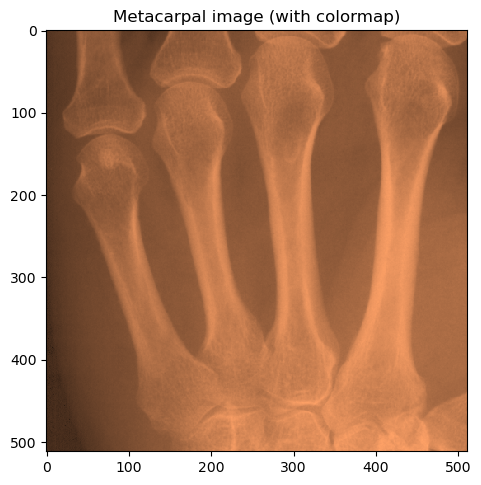

In [7]:
io.imshow(im_org, cmap="copper")
plt.title('Metacarpal image (with colormap)')
io.show()

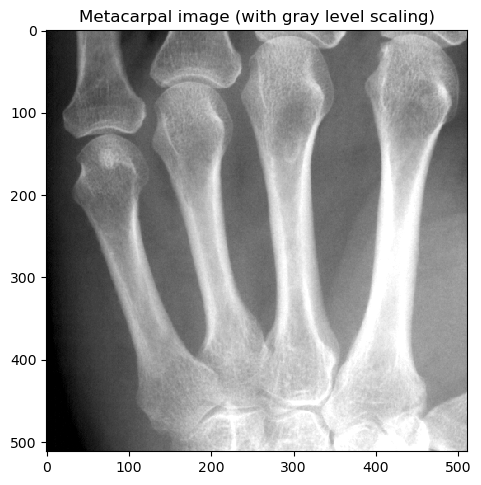

In [8]:
#Pixels with values of 20 and below will be visualized black and pixels 
#with values of 170 and above as white and values in between as shades of gray.
io.imshow(im_org, vmin=60, vmax=190)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

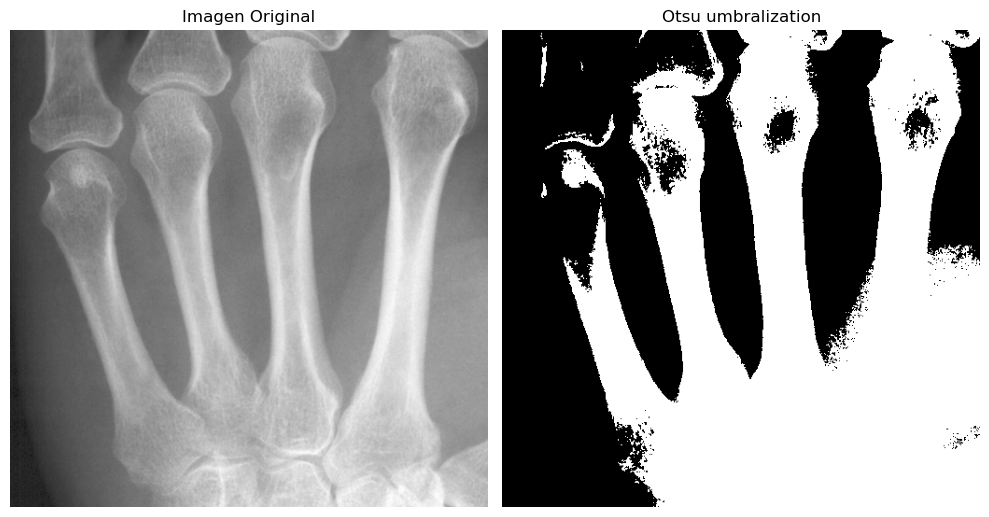

In [16]:
# EXCERSISE 7
# Otsu's thresholding
img = cv.imread('metacarpals.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
#here we apply the otsu method // th2 is the otsu image
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(th2, cmap='gray')
plt.title('Otsu umbralization')
plt.axis('off')

plt.tight_layout()
plt.show()

HISTOGRAM FUNCTIONS

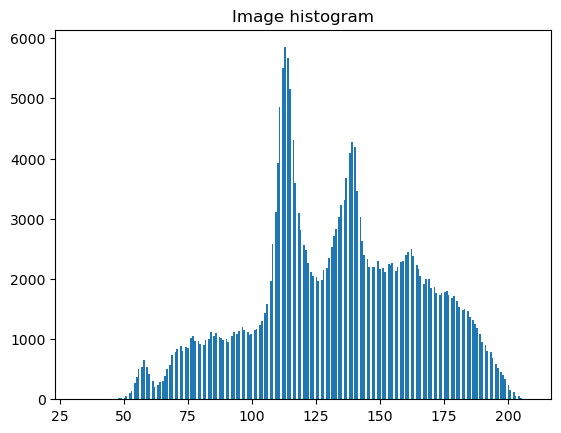

In [10]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

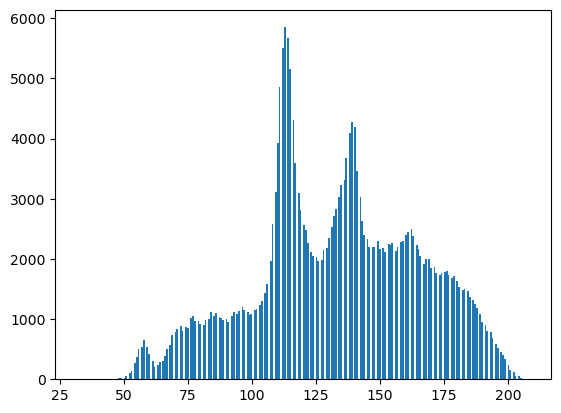

In [11]:
#The bin values of the histogram can also be stored by writing:
h = plt.hist(im_org.ravel(), bins=256)

In [12]:
#The value of a given bin can be found by:
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

There are 1147.0 pixel values in bin 100


In [13]:
#Here h is a list of tuples, where in each tuple the first element is the bin count and the second is the
#bin edge. So the bin edges can for example be found by:
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

Bin edges: 100.75 to 101.4375


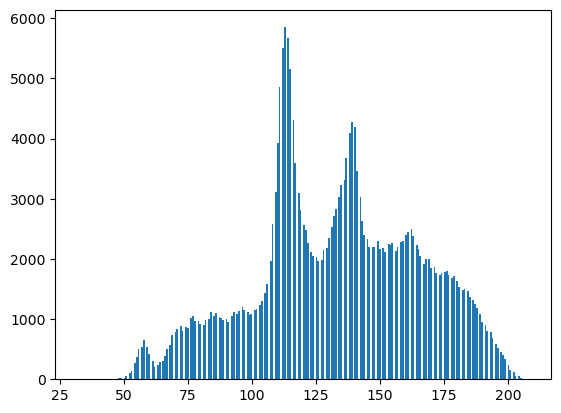

In [14]:
y, x, _ = plt.hist(im_org.ravel(), bins=256)

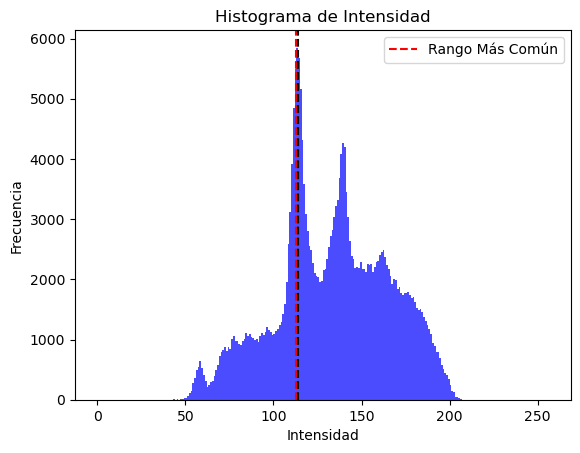

El rango de intensidad más común es (113.0, 114.0)


In [15]:
#Excersise 9
import numpy as np
import matplotlib.pyplot as plt

# Genera datos de intensidad de ejemplo
intensity_data = im_org.ravel()

# Calcula el histograma
hist, bins = np.histogram(intensity_data, bins=256, range=(0, 256))

# Encuentra el bin (rango) con la frecuencia máxima (bin que mas se repite)
most_common_bin = np.argmax(hist)

# Determina el rango de intensidad correspondiente
most_common_range = (bins[most_common_bin], bins[most_common_bin + 1])

# Grafica el histograma
plt.hist(intensity_data, bins=256, range=(0, 256), color='b', alpha=0.7)
plt.axvline(x=most_common_range[0], color='r', linestyle='dashed', label='Rango Más Común')
plt.axvline(x=most_common_range[1], color='k', linestyle='dashed')
plt.legend()
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Intensidad')
plt.show()

print(f"El rango de intensidad más común es {most_common_range}")


In [16]:
#encontrar row y column de una imagen (valor de pixel)
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


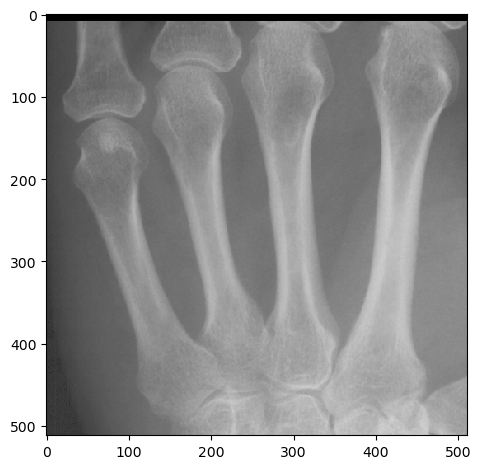

In [17]:
im_org[:10] = 0
io.imshow(im_org)
io.show()

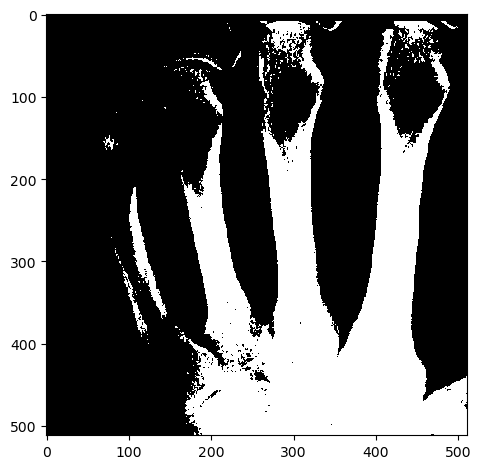

In [18]:
#mascaras / lo mayor de 150 lo pone 1 y si no lo pone a 0
mask = im_org > 150
io.imshow(mask)
io.show()

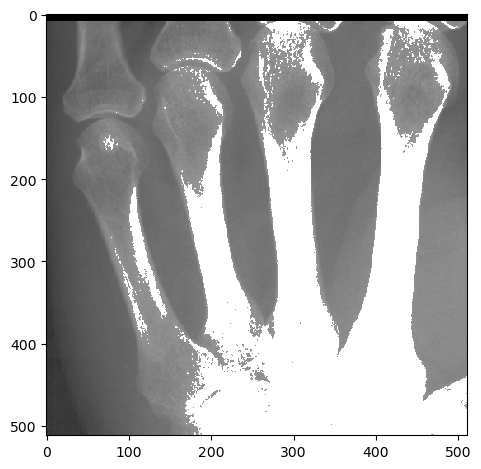

In [19]:
im_org[mask] = 255
io.imshow(im_org)
io.show()
#Los píxeles que cumplen la condición en la máscara (True) tendrán sus valores cambiados a 255,
#lo que representa el valor máximo de intensidad en una imagen en escala de grises.

COLOR EN IMAGENES

In [20]:
# Directory containing data and images
in_dir = "./data"

# X-ray image
im_name = "/ardeche.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [21]:
print(im_org.shape)

(600, 800, 3)


In [22]:
print(im_org.dtype)

uint8


In [23]:
#encontrar row y column de una imagen (valor de pixel)
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: [119 178 238]


In [24]:
r = 110
c = 90
im_org[r, c] = [255, 0, 0]

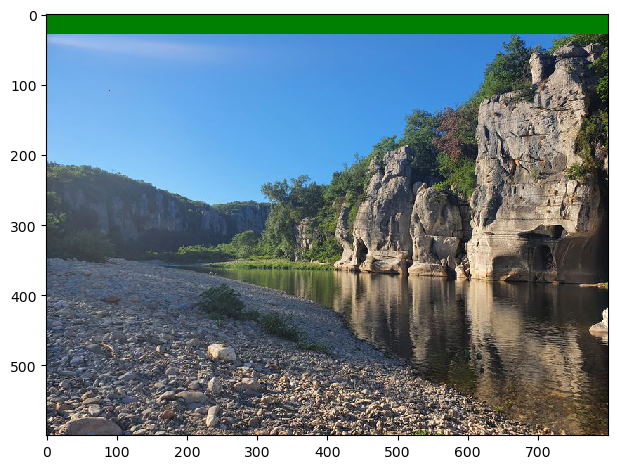

In [25]:
#Exercise 16: Try to use NumPy slicing to color the upper half of the photo green.
im_org[:30]=[0, 128, 0]
io.imshow(im_org)
io.show()

In [53]:
rows = im_org.shape[0]
r_2 = rows // 2 #obtener la mitad de la imagen en filas

# Use NumPy slicing to color the upper half of the image green
im_org[:r_2, :, 1] = 255  # Set the green channel to maximum (255) for the upper half
#primero cojo desde la primera filas hasta la mitad de la imagen r_2, luego todas las columnas, leugo selecciono el canal RGB
# R=0, G=1, B=2
# Display the modified image
io.imshow(im_org)
io.show()

NameError: name 'im_org' is not defined

In [32]:
# Directory containing data and images
in_dir = "./data"

# X-ray image
im_name = "/lol.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

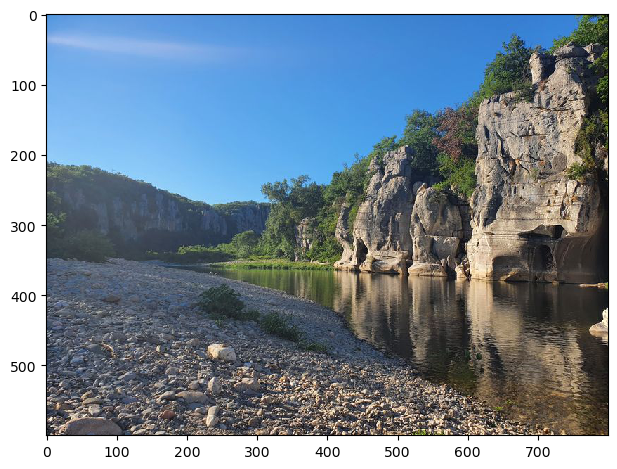

In [33]:
io.imshow(im_org)

In [45]:
image_rescaled = rescale(im_org, 0.2, anti_aliasing=True,
                         channel_axis=2)

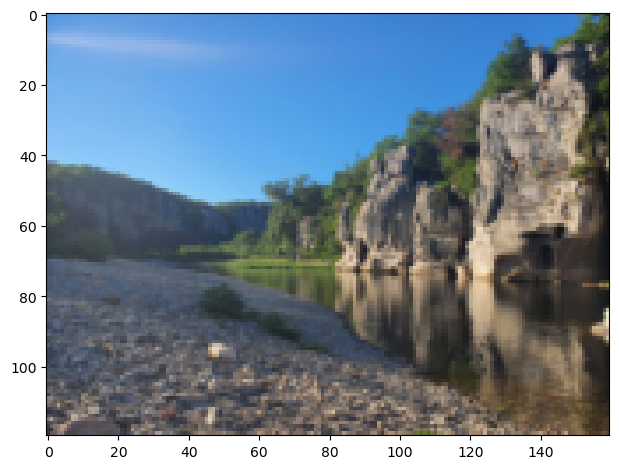

In [46]:
io.imshow(image_rescaled)

In [47]:
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 6),
                       anti_aliasing=True)

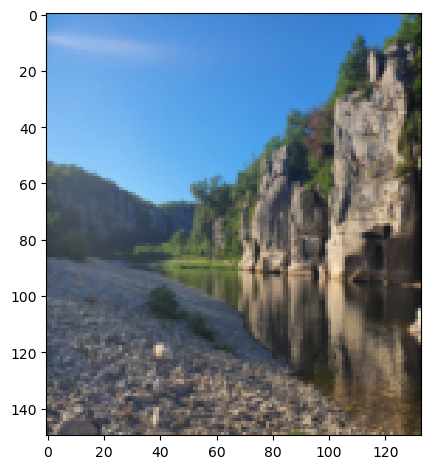

In [48]:
io.imshow(image_resized)

In [49]:
im_gray = color.rgb2gray(im_org)
im_byte = img_as_ubyte(im_gray)

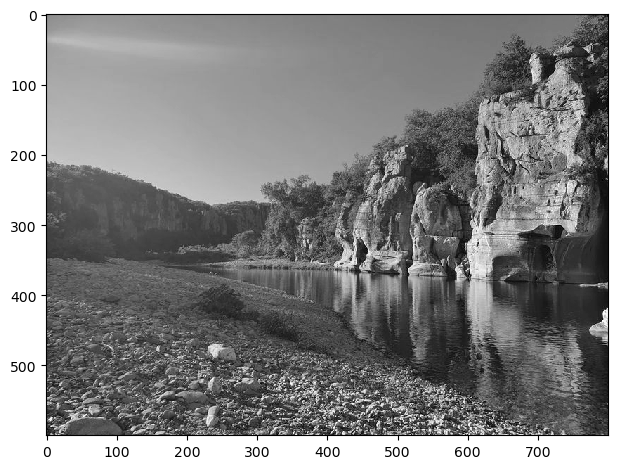

In [50]:
io.imshow(im_byte)

Alto de la imagen:400


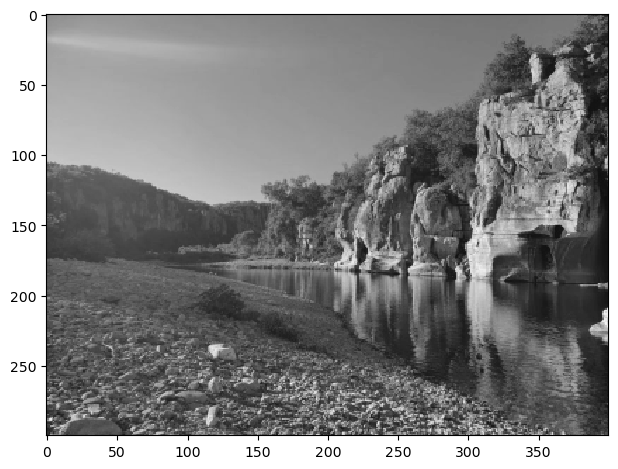

In [61]:
from skimage import io, color, img_as_ubyte, transform
#automatically scale image to 400 height
desired_width=400
# Calculate the scaling factor to maintain the aspect ratio
scaling_factor = desired_width / im_byte.shape[1]

# Calculate the new height based on the aspect ratio
new_height = int(im_byte.shape[0] * scaling_factor)

# Resize the image while preserving the aspect ratio
im_resized = transform.resize(im_byte, (new_height, desired_width), anti_aliasing=True)

io.imshow(im_resized)  
print(f'Alto de la imagen:{im_resized.shape[1]}')

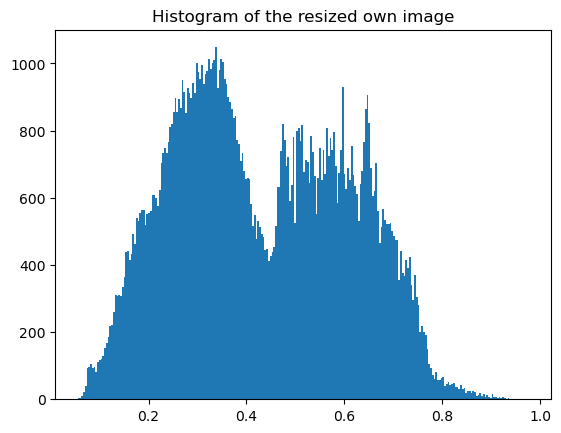

In [66]:
plt.hist(im_resized.ravel(), bins=256)
plt.title('Histogram of the resized own image')
plt.show()

LOOK UP FOR 2 IMAGES (WHITE AND BLACK) COMPARE HISTOGRAMS

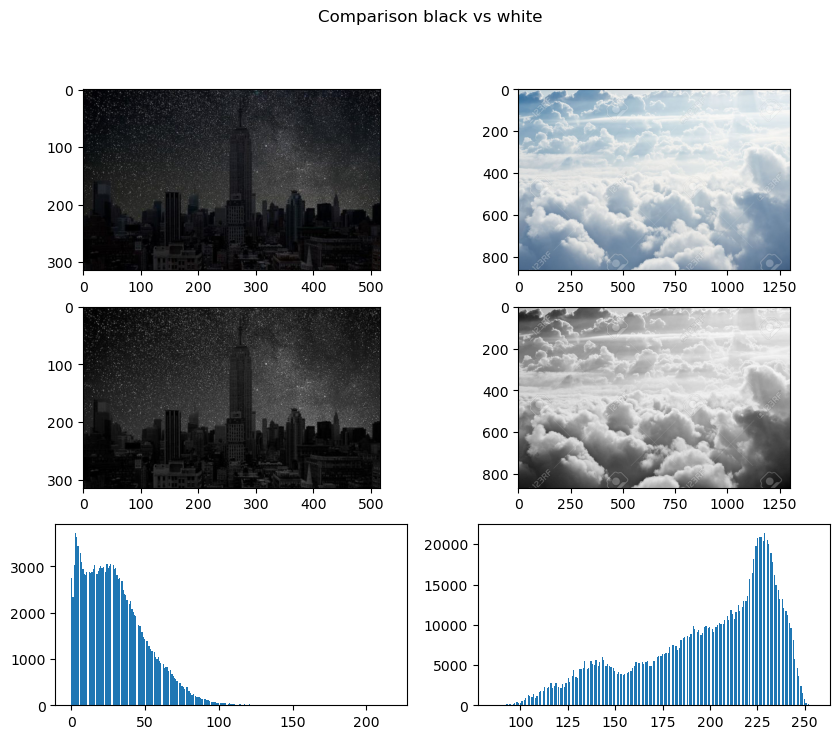

In [36]:
im_city = io.imread("city.jpg")
im_nubes = io.imread("nubes.jpg")

#convert the images to gray 
im_gray_city = color.rgb2gray(im_city)
im_byte_city = img_as_ubyte(im_gray_city)

im_gray_nubes = color.rgb2gray(im_nubes)
im_byte_nubes = img_as_ubyte(im_gray_nubes)

#plot the iamges and its histograms
f, axarr = plt.subplots(3, 2,  figsize=(10, 8))
plt.suptitle('Comparison black vs white')
axarr[0,0].imshow(im_city)  # Índice 0 para el primer elemento
axarr[0,1].imshow(im_zapas)  # Índice 1 para el segundo elemento
axarr[1,0].imshow(im_byte_city, cmap='gray')  
axarr[1,1].imshow(im_byte_nubes, cmap='gray') 
axarr[2,0].hist(im_byte_city.ravel(), bins=256) 
axarr[2,1].hist(im_byte_nubes.ravel(), bins=256) 
plt.show()

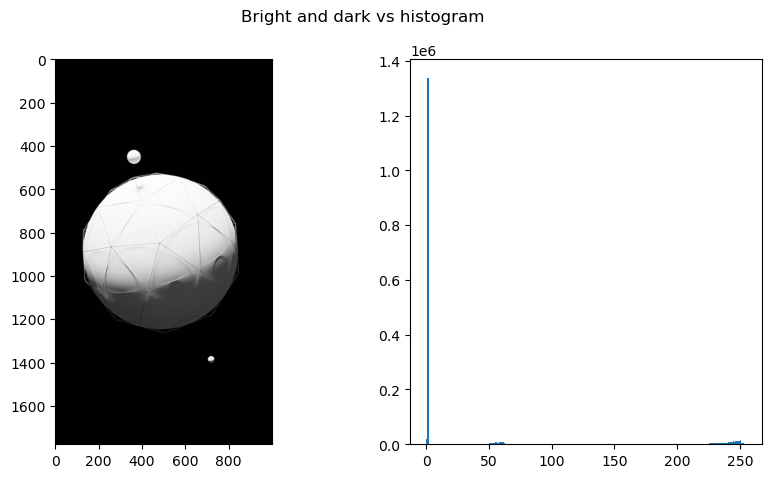

In [46]:
im_moon = io.imread('moon.jpeg')
im_moon_gray = color.rgb2gray(im_moon)
im_byte_moon = img_as_ubyte(im_moon_gray)
f, axarr = plt.subplots(1, 2,  figsize=(10, 5))
axarr[0].imshow(im_byte_moon, cmap='gray')
axarr[1].hist(im_byte_moon.ravel(), bins=256)
plt.suptitle("Bright and dark vs histogram")
plt.show()

## Color channels


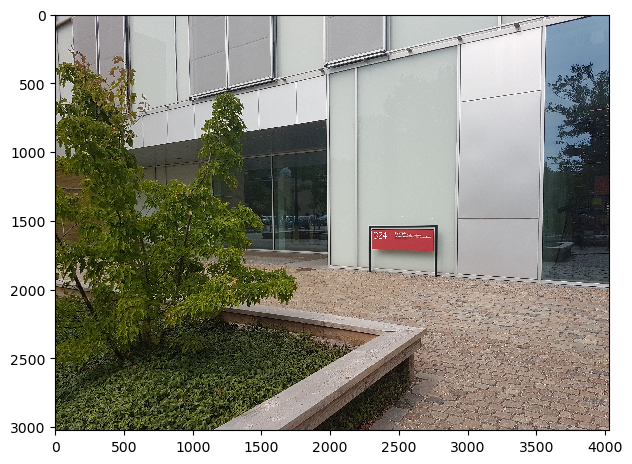

In [3]:
im_dtu = io.imread('./data/DTUSign1.jpg')
io.imshow(im_dtu)

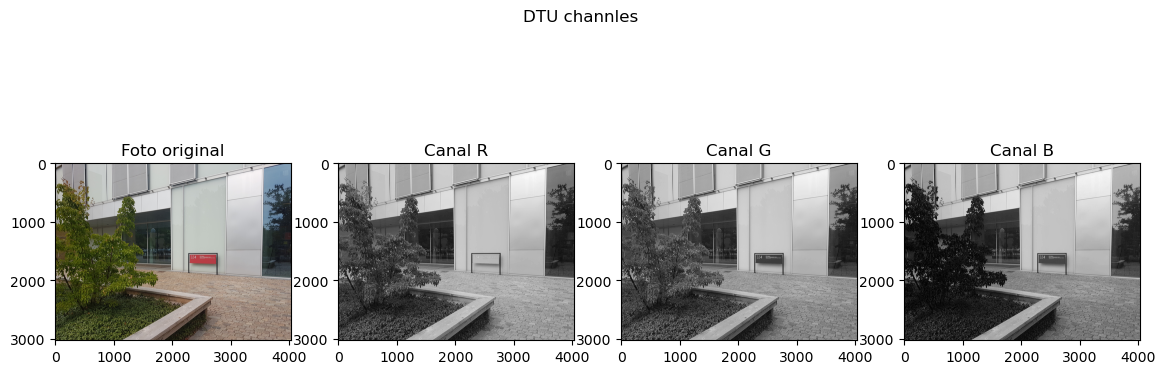

In [65]:
r_comp = im_dtu[:, :, 0]
g_comp = im_dtu[:, :, 1]
b_comp = im_dtu[:, :, 2]
#notacion: [filas_inicio:final_final , columnas_inicio:columnas_final, canal RGB]
f, axarr = plt.subplots(1,4, figsize=(14,5))
axarr[0].imshow(im_dtu)
axarr[0].set_title('Foto original')  # Título del primer subplot

axarr[1].imshow(r_comp, cmap='gray')
axarr[1].set_title('Canal R')  # Título del primer subplot

axarr[2].imshow(g_comp, cmap='gray')
axarr[2].set_title('Canal G')  # Título del segundo subplot

axarr[3].imshow(b_comp, cmap='gray')
axarr[3].set_title('Canal B')  # Título del tercer subplot

plt.suptitle('DTU channles')
plt.show()


Visualize the R, G, and B components individually. Why does the DTU Compute sign look bright on the R channel image and dark on the G and B channels? Why do the walls of the building look bright in all channels?

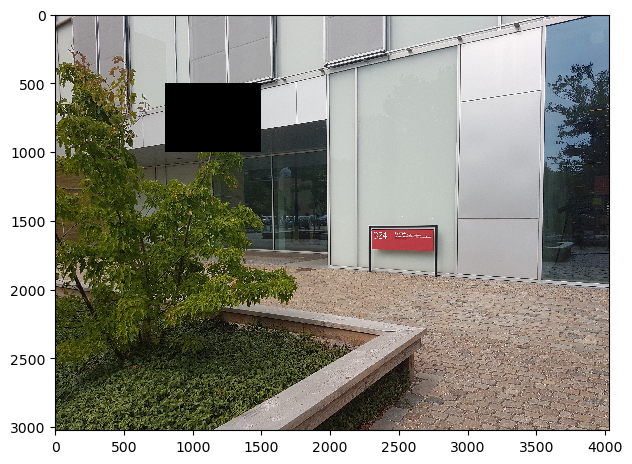

In [72]:
im_dtu[500:1000, 800:1500, :] = 0
io.imshow(im_dtu)

In [70]:
io.imsave('im_dtu_marked.png',im_dtu)

## VER DE NUEVO Y BIEN LAS SOLUCIONES


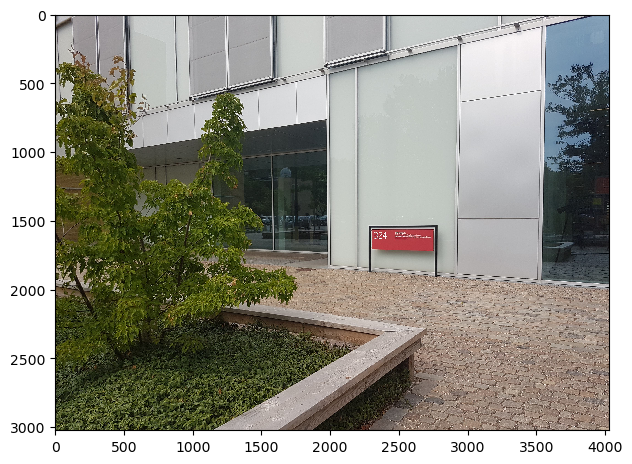

In [5]:
im_dtu_copy[2000:1600, 3000:1000, :] = [0, 0, 255]

# Guardar la imagen resultante
io.imsave('imageAzul.jpg', im_dtu_copy)

# Mostrar la imagen con el rectángulo azul
im_azul=io.imread('imageAzul.jpg')
io.imshow(im_dtu_copy)
io.show()

## VER DE NUEVO Y BIEN LAS SOLUCIONES


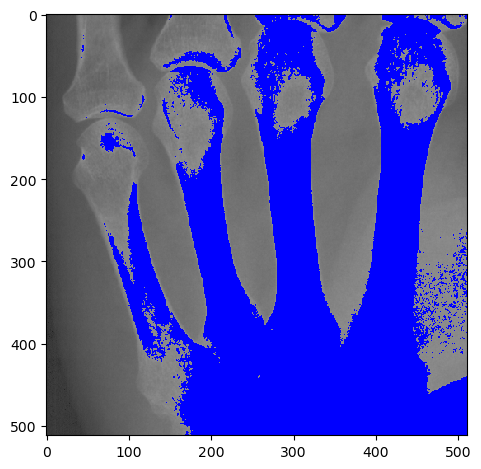

In [23]:
import numpy as np
from skimage import io, color

# Load the original grayscale image
im_metacarpals = io.imread('metacarpals.png')

# Create a pixel mask for the bones (you may need to adjust the threshold)
bone_mask = im_metacarpals > 140  # Adjust the threshold as needed

# Create a blue color channel with the same shape as the grayscale image
blue_channel = np.zeros_like(im_metacarpals)

# Set the blue color channel to 255 (maximum blue) where the bone_mask is True
blue_channel[bone_mask] = 255

# Convert the grayscale image to RGB
im_metacarpals_rgb = color.gray2rgb(im_metacarpals)

# Assign the blue color channel to the RGB image where the bone_mask is True
im_metacarpals_rgb[bone_mask] = [0, 0, 255]

# Save or display the resulting image
io.imshow(im_metacarpals_rgb)
io.show()



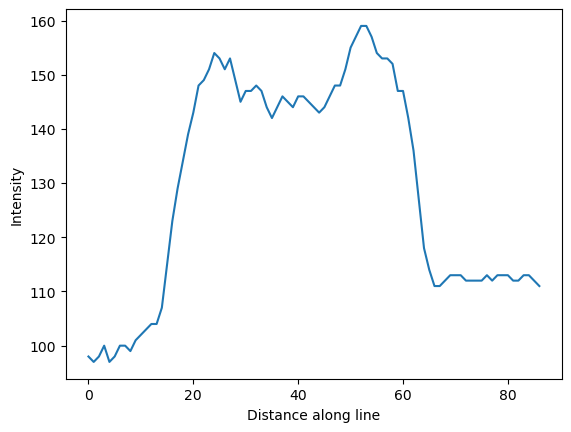

In [24]:
im_org = io.imread('metacarpals.png')
p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()
# hay mas intensidad y mas recorrido de hueso por eso la figura se ve de esta manera

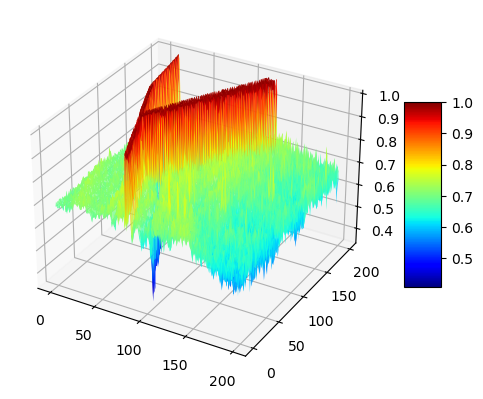

In [26]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [27]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

In [32]:
print(f'Rows: {ds.Rows}')
print(f'Columns: {ds.Columns}')

Rows: 512
Columns: 512


In [38]:
im = ds.pixel_array

AttributeError: 'numpy.ndarray' object has no attribute 'd_type'

In [36]:
print(im.shape)

(512, 512)


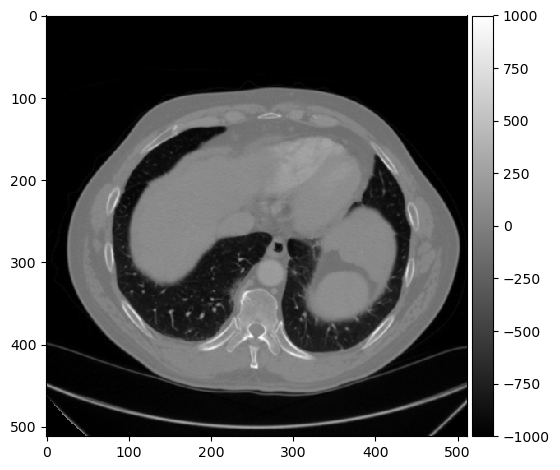

In [34]:
io.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
io.show()